In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
# Ścieżka do pliku CSV
file_path = "rgb.csv"

# Wczytanie pliku CSV do DataFrame
df = pd.read_csv(file_path)

# Wyświetlenie pierwszych 5 wierszy DataFrame
df.head()

,AUC,Precision,Recall,TN,TP,accuracy,loss,val_AUC,val_Precision,val_Recall,val_TN,val_TP,val_accuracy,val_loss
0,0.607577,0.540931,0.195080,4424.0,674.0,0.603242,0.661578,0.657790,0.581443,0.338129,2089.0,564.0,0.637281,0.638363
1,0.639288,0.576829,0.273806,4302.0,946.0,0.620992,0.648213,0.649809,0.502162,0.626499,1459.0,1045.0,0.601489,0.661411
2,0.652512,0.578296,0.351664,4110.0,1215.0,0.630103,0.642394,0.685849,0.587899,0.431055,1991.0,719.0,0.650973,0.622832
3,0.675036,0.594885,0.417366,4014.0,1442.0,0.645604,0.633778,0.691074,0.663717,0.089928,2419.0,150.0,0.617103,0.635768
4,0.689533,0.604596,0.441679,3998.0,1526.0,0.653650,0.624577,0.725903,0.611221,0.555156,1906.0,926.0,0.680279,0.609530


In [67]:
max_values = df.max()
max_values

AUC                 0.967217
Precision           0.838710
Recall              0.940666
TN               4424.000000
TP               3250.000000
accuracy            0.901787
loss                0.661578
val_AUC             0.951005
val_Precision       0.826340
val_Recall          0.961031
val_TN           2419.000000
val_TP           1603.000000
val_accuracy        0.888542
val_loss            0.661411
dtype: float64

In [68]:
min = df['val_loss'].idxmin()
df.loc[min]

AUC                 0.961975
Precision           0.831118
Recall              0.923010
TN               4348.000000
TP               3189.000000
accuracy            0.891847
loss                0.240860
val_AUC             0.949517
val_Precision       0.804716
val_Recall          0.941247
val_TN           2114.000000
val_TP           1570.000000
val_accuracy        0.884939
val_loss            0.260120
Name: 17, dtype: float64

In [69]:
df.columns = [
    'auc_trening', 'Precyzja Trening', 'Czułość Trening',
    'tn_trening', 'tp_trening', 'Dokładność Trening', 'Strata Trening',
    'auc_test', 'Precyzja Test', 'Czułość Test',
    'tn_test', 'tp_test', 'Dokładność Test', 'Strata Test'
]
df.head()

,auc_trening,Precyzja Trening,Czułość Trening,tn_trening,tp_trening,Dokładność Trening,Strata Trening,auc_test,Precyzja Test,Czułość Test,tn_test,tp_test,Dokładność Test,Strata Test
0,0.607577,0.540931,0.195080,4424.0,674.0,0.603242,0.661578,0.657790,0.581443,0.338129,2089.0,564.0,0.637281,0.638363
1,0.639288,0.576829,0.273806,4302.0,946.0,0.620992,0.648213,0.649809,0.502162,0.626499,1459.0,1045.0,0.601489,0.661411
2,0.652512,0.578296,0.351664,4110.0,1215.0,0.630103,0.642394,0.685849,0.587899,0.431055,1991.0,719.0,0.650973,0.622832
3,0.675036,0.594885,0.417366,4014.0,1442.0,0.645604,0.633778,0.691074,0.663717,0.089928,2419.0,150.0,0.617103,0.635768
4,0.689533,0.604596,0.441679,3998.0,1526.0,0.653650,0.624577,0.725903,0.611221,0.555156,1906.0,926.0,0.680279,0.609530


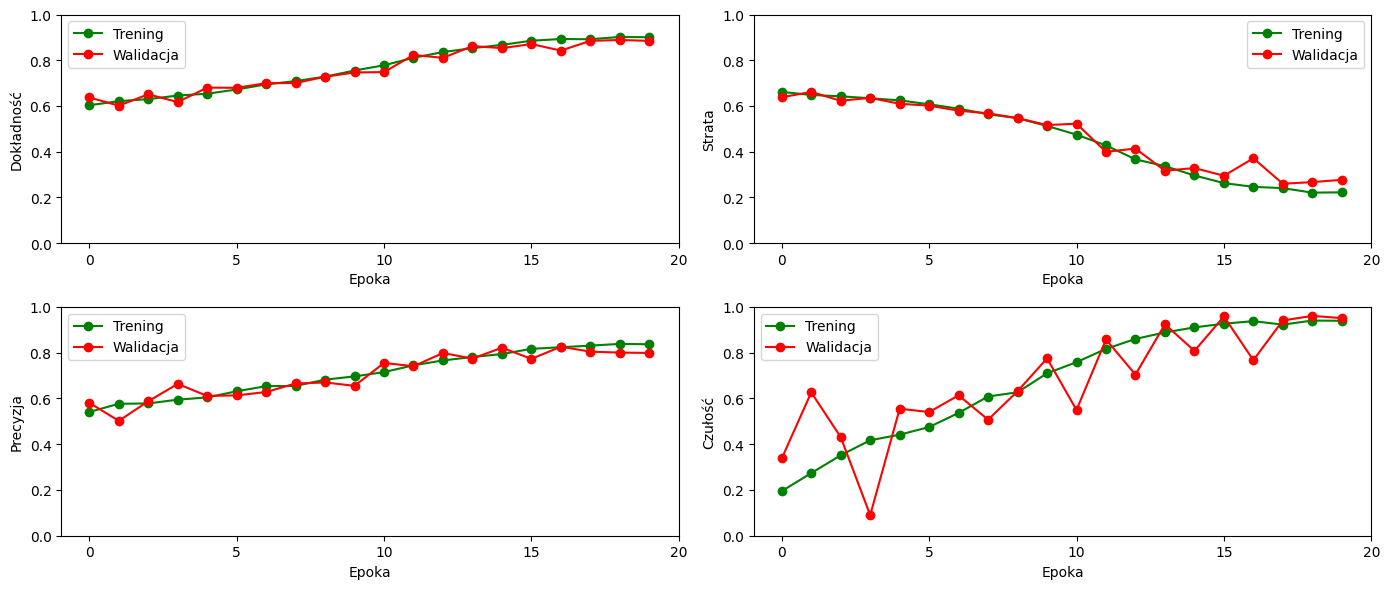

In [70]:
fig, axes = plt.subplots(2, 2, figsize=(14, 6))
 
# Ustawienia osi x
x_ticks = [0, 5, 10, 15, 20]
 
# Wykres dla Dokładności
axes[0, 0].plot(df['Dokładność Trening'], label='Trening', color='green', marker='o')
axes[0, 0].plot(df['Dokładność Test'], label='Walidacja', color='red', marker='o')
axes[0, 0].set_xlabel('Epoka')
axes[0, 0].set_ylabel('Dokładność')
axes[0, 0].set_ylim(0, 1)
axes[0, 0].set_xticks(x_ticks)
axes[0, 0].legend()
 
# Wykres dla Straty
axes[0, 1].plot(df['Strata Trening'], label='Trening', color='green', marker='o')
axes[0, 1].plot(df['Strata Test'], label='Walidacja', color='red', marker='o')
axes[0, 1].set_xlabel('Epoka')
axes[0, 1].set_ylabel('Strata')
axes[0, 1].set_ylim(0, 1)
axes[0, 1].set_xticks(x_ticks)
axes[0, 1].legend()
 
# Wykres dla Precyzji
axes[1, 0].plot(df['Precyzja Trening'], label='Trening', color='green', marker='o')
axes[1, 0].plot(df['Precyzja Test'], label='Walidacja', color='red', marker='o')
axes[1, 0].set_xlabel('Epoka')
axes[1, 0].set_ylabel('Precyzja')
axes[1, 0].set_ylim(0, 1)
axes[1, 0].set_xticks(x_ticks)
axes[1, 0].legend()
 
# Wykres dla Czułości
axes[1, 1].plot(df['Czułość Trening'], label='Trening', color='green', marker='o')
axes[1, 1].plot(df['Czułość Test'], label='Walidacja', color='red', marker='o')
axes[1, 1].set_xlabel('Epoka')
axes[1, 1].set_ylabel('Czułość')
axes[1, 1].set_ylim(0, 1)
axes[1, 1].set_xticks(x_ticks)
axes[1, 1].legend()
 
# Zapis do pliku SVG
plt.tight_layout()
plt.savefig('training_rgb.svg', format='svg')
plt.show()